### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
name_val_count = application_df['NAME'].value_counts()

In [3]:
name_val_count[0:6]

PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC     408
PTA TEXAS CONGRESS                                  368
Name: NAME, dtype: int64

In [4]:
print(application_df.shape)

(34299, 12)


In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
# Remove the "IsTrading" column. 
application_df.drop(columns=['EIN', 'NAME'], inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
print(application_df.shape)

(34299, 10)


In [7]:
# Determine the number of unique values in each column.
for col in application_df:
  print(application_df[col].unique())

['T10' 'T3' 'T5' 'T7' 'T4' 'T6' 'T2' 'T9' 'T19' 'T8' 'T13' 'T12' 'T29'
 'T25' 'T14' 'T17' 'T15']
['Independent' 'CompanySponsored' 'Family/Parent' 'National' 'Regional'
 'Other']
['C1000' 'C2000' 'C3000' 'C1200' 'C2700' 'C7000' 'C7200' 'C1700' 'C4000'
 'C7100' 'C2800' 'C6000' 'C2100' 'C1238' 'C5000' 'C7120' 'C1800' 'C4100'
 'C1400' 'C1270' 'C2300' 'C8200' 'C1500' 'C7210' 'C1300' 'C1230' 'C1280'
 'C1240' 'C2710' 'C2561' 'C1250' 'C8000' 'C1245' 'C1260' 'C1235' 'C1720'
 'C1257' 'C4500' 'C2400' 'C8210' 'C1600' 'C1278' 'C1237' 'C4120' 'C2170'
 'C1728' 'C1732' 'C2380' 'C1283' 'C1570' 'C2500' 'C1267' 'C3700' 'C1580'
 'C2570' 'C1256' 'C1236' 'C1234' 'C1246' 'C2190' 'C4200' 'C0' 'C3200'
 'C5200' 'C1370' 'C2600' 'C1248' 'C6100' 'C1820' 'C1900' 'C2150']
['ProductDev' 'Preservation' 'Heathcare' 'CommunityServ' 'Other']
['Association' 'Co-operative' 'Trust' 'Corporation']
[1 0]
['0' '1-9999' '10000-24999' '100000-499999' '10M-50M' '25000-99999' '50M+'
 '1M-5M' '5M-10M']
['N' 'Y']
[    5000   108590

In [8]:
# Determine the number of unique values in each column.
for col in application_df:
  print(application_df[col].value_counts())

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
1    34294
0        5
Name: STATUS, dtype: int64
0                24388
25000

In [9]:
# Find null values
for column in application_df.columns:
   print(f"Column {column} has {application_df[column].isnull().sum()} null values")

Column APPLICATION_TYPE has 0 null values
Column AFFILIATION has 0 null values
Column CLASSIFICATION has 0 null values
Column USE_CASE has 0 null values
Column ORGANIZATION has 0 null values
Column STATUS has 0 null values
Column INCOME_AMT has 0 null values
Column SPECIAL_CONSIDERATIONS has 0 null values
Column ASK_AMT has 0 null values
Column IS_SUCCESSFUL has 0 null values


In [10]:
# Remove rows that have at least 1 null value.
# application_df = application_df.dropna()
# application_df.head(5)

In [11]:
application_df.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,3.429900e+04,34299.000000
mean,0.999854,2.769199e+06,0.532406
std,0.012073,8.713045e+07,0.498956
min,0.000000,5.000000e+03,0.000000
25%,1.000000,5.000000e+03,0.000000
50%,1.000000,5.000000e+03,1.000000
75%,1.000000,7.742000e+03,1.000000
max,1.000000,8.597806e+09,1.000000


In [12]:
# Find duplicate entries
print(f"Duplicate entries: {application_df.duplicated().sum()}")

Duplicate entries: 24677


In [13]:
application_df.drop_duplicates()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34284,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856,0
34287,T3,Independent,C1200,Preservation,Trust,1,25000-99999,N,6713,1
34289,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197,1
34290,T4,CompanySponsored,C3000,Preservation,Association,1,1-9999,N,5000,0


In [14]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [15]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

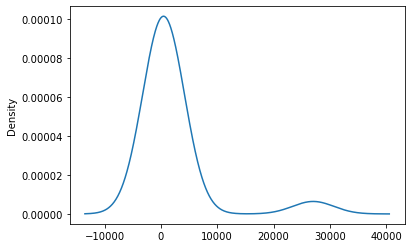

In [16]:
# Visualize the value counts of APPLICATION_TYPE
app_type_counts.plot.density()

In [17]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_counts[app_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [18]:
# Look at CLASSIFICATION value counts for binning
# Look at APPLICATION_TYPE value counts for binning
class_type_counts = application_df.CLASSIFICATION.value_counts()
class_type_counts[0:10]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: CLASSIFICATION, dtype: int64

In [19]:
class_type_counts.dtype

dtype('int64')

<AxesSubplot:ylabel='Density'>

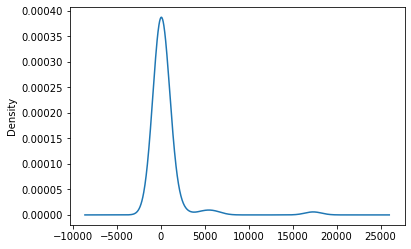

In [20]:
# Visualize the value counts of CLASSIFICATION
class_type_counts.plot.density()

In [21]:
# Determine which values to replace if counts are less than ..?
replace_class = list(app_type_counts[app_type_counts < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [22]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [23]:
# Check the number of unique values in each column
application_df[application_cat].nunique()

APPLICATION_TYPE           9
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [24]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\motte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
len(X_train[0])

108

In [29]:
X_train.shape

(25724, 108)

### Deliverable 2: Compile, Train and Evaluate the Model

In [30]:
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 75
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 75)                8175      
                                                                 
 dense_1 (Dense)             (None, 30)                2280      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 10,486
Trainable params: 10,486
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback
from keras.callbacks import History
history = History()
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [32]:
# class WeightsSaver(Callback):
#   def __init__(self, N):
#     self.N = N
#     self.epoch = 0

#   def on_epoch_end(self, epoch, logs={}):
#     if self.epoch % self.N == 0:
#       name = 'weights%08d.h5' % self.epoch
#       self.model.save_weights(name)
#     self.epoch += 1

In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
batch_size = 25

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1, save_weights_only=True, save_freq=5*batch_size)

In [34]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=25,callbacks=[cp_callback])
history = nn.fit(X_train_scaled, y_train, validation_split=0.20, epochs=25, batch_size=804,callbacks=[cp_callback])

Epoch 1/25
26/26 [==============================] - 1s 9ms/step - loss: 0.6408 - accuracy: 0.6831 - val_loss: 0.6000 - val_accuracy: 0.7102
Epoch 2/25
26/26 [==============================] - 0s 3ms/step - loss: 0.5766 - accuracy: 0.7303 - val_loss: 0.5745 - val_accuracy: 0.7213
Epoch 3/25
26/26 [==============================] - 0s 3ms/step - loss: 0.5575 - accuracy: 0.7326 - val_loss: 0.5679 - val_accuracy: 0.7217
Epoch 4/25
26/26 [==============================] - 0s 3ms/step - loss: 0.5502 - accuracy: 0.7348 - val_loss: 0.5641 - val_accuracy: 0.7228
Epoch 5/25
 1/26 [>.............................] - ETA: 0s - loss: 0.5644 - accuracy: 0.7214
Epoch 00005: saving model to checkpoints\weights.05.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.7354 - val_loss: 0.5637 - val_accuracy: 0.7221
Epoch 6/25
26/26 [==============================] - 0s 3ms/step - loss: 0.5452 - accuracy: 0.7361 - val_loss: 0.5625 - val_accuracy: 0.7244
Epoch 7/25
26/26 [==

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5567 - accuracy: 0.7257 - 173ms/epoch - 646us/step
Loss: 0.5566726922988892, Accuracy: 0.7257142663002014


In [37]:
# Export our model to HDF5 file
nn.save("trained_application.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


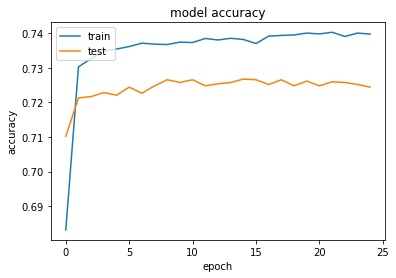

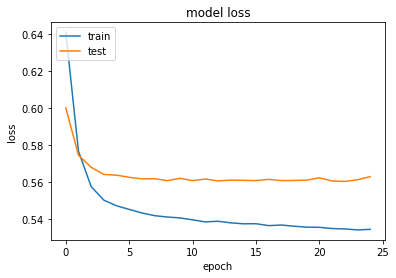

In [38]:
import matplotlib.pyplot as plt
import numpy

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()